In [1]:
import requests

import pandas as pd
import matplotlib.pyplot as plt

from Historic_Crypto import HistoricalData
from scripts.params import COIN_API
from datetime import date, datetime, timedelta


# Fear and Greed Index API

Free API that provides one index per day.

`'time_until_update'` value - present only for the last output 

* API just for Bitcoin

 **What this index includes?**
* Volatility = 25%
* Market Momentum/Volume = 25%
* Social Media (twitter & reddit) = 15%
* Surveys (currently posed) = 15%
* Dominance (based on Bitcoin) = 10%
* Trends = 10%

In [2]:
url = 'https://api.alternative.me/fng/'
params = {'limit': 100000,
          'date_format': 'world'
         }
response = requests.get(url, params).json()
response

{'name': 'Fear and Greed Index',
 'data': [{'value': '55',
   'value_classification': 'Greed',
   'timestamp': '27-01-2023',
   'time_until_update': '-1674734272'},
  {'value': '54',
   'value_classification': 'Neutral',
   'timestamp': '26-01-2023'},
  {'value': '51',
   'value_classification': 'Neutral',
   'timestamp': '25-01-2023'},
  {'value': '52',
   'value_classification': 'Neutral',
   'timestamp': '24-01-2023'},
  {'value': '50',
   'value_classification': 'Neutral',
   'timestamp': '23-01-2023'},
  {'value': '53',
   'value_classification': 'Neutral',
   'timestamp': '22-01-2023'},
  {'value': '53',
   'value_classification': 'Neutral',
   'timestamp': '21-01-2023'},
  {'value': '51',
   'value_classification': 'Neutral',
   'timestamp': '20-01-2023'},
  {'value': '45', 'value_classification': 'Fear', 'timestamp': '19-01-2023'},
  {'value': '52',
   'value_classification': 'Neutral',
   'timestamp': '18-01-2023'},
  {'value': '51',
   'value_classification': 'Neutral',
   't

In [3]:
fng_df = pd.DataFrame(response['data']).drop(columns='time_until_update')
fng_df

,value,value_classification,timestamp
0,55,Greed,27-01-2023
1,54,Neutral,26-01-2023
2,51,Neutral,25-01-2023
3,52,Neutral,24-01-2023
4,50,Neutral,23-01-2023
...,...,...,...
1814,11,Extreme Fear,05-02-2018
1815,24,Extreme Fear,04-02-2018
1816,40,Fear,03-02-2018
1817,15,Extreme Fear,02-02-2018


Getting the last datapoint date and transforming it into string to use it further for API requests

In [4]:
last_timestamp = fng_df.iloc[-1]['timestamp']
last_fng_timestamp = datetime.strptime(last_timestamp, '%d-%m-%Y').strftime('%Y-%m-%d')
last_fng_timestamp

'2018-02-01'

In [5]:
fng_df.timestamp = pd.to_datetime(fng_df.timestamp, format='%d-%m-%Y')
fng_df.set_index('timestamp', inplace=True)

In [6]:
fng_df.value = fng_df.value.astype('float')

In [7]:
fng_df.head()

,value,value_classification
timestamp,,
2023-01-27,55.0,Greed
2023-01-26,54.0,Neutral
2023-01-25,51.0,Neutral
2023-01-24,52.0,Neutral
2023-01-23,50.0,Neutral


In [8]:
fng_df.dtypes

value                   float64
value_classification     object
dtype: object

In [9]:
min_val = fng_df[fng_df.value == fng_df.value.min()]
min_val

,value,value_classification
timestamp,,
2019-08-22,5.0,Extreme Fear


In [10]:
max_val = fng_df[fng_df.value == fng_df.value.max()]
max_val

,value,value_classification
timestamp,,
2021-02-17,95.0,Extreme Greed
2021-02-16,95.0,Extreme Greed
2021-02-14,95.0,Extreme Greed
2021-02-09,95.0,Extreme Greed
2021-01-06,95.0,Extreme Greed
2020-12-31,95.0,Extreme Greed
2020-12-18,95.0,Extreme Greed
2020-12-14,95.0,Extreme Greed
2020-12-08,95.0,Extreme Greed


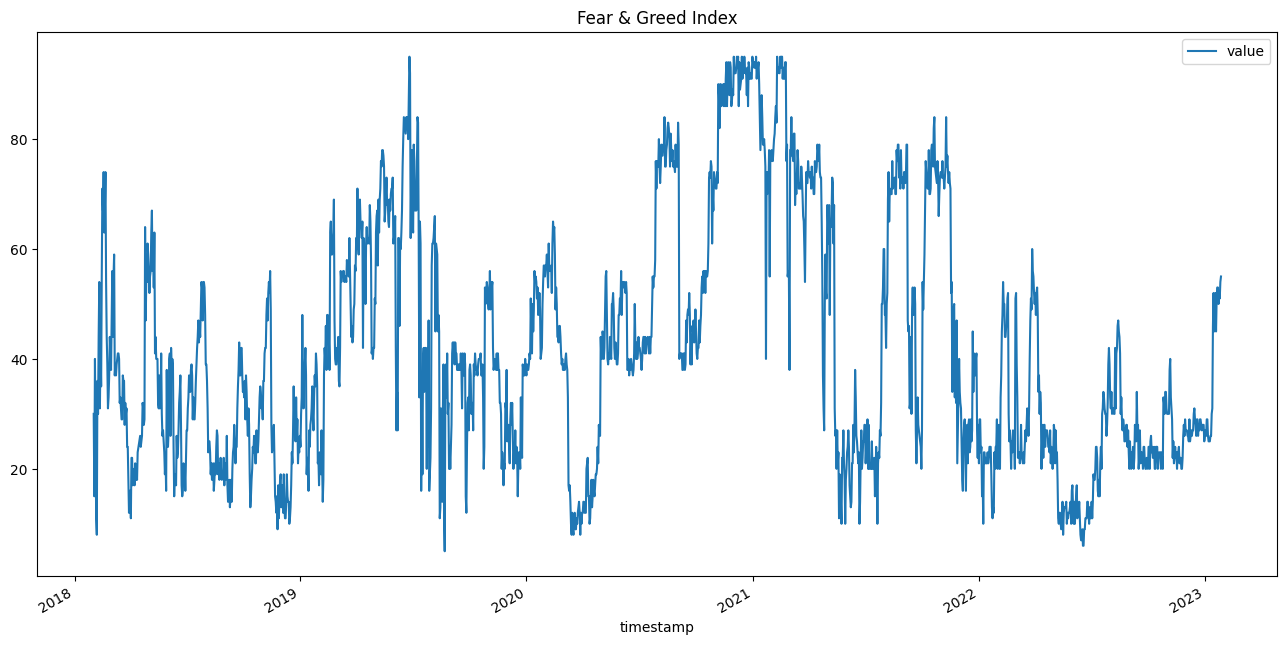

In [11]:
fng_df.plot(y='value', use_index=True, figsize=(16,8), title='Fear & Greed Index');

# Historical data

Library that provides historical crypto data

**quite slow comparing to folowwing api**

In [12]:
dataset = HistoricalData(start_date = '2023-01-01-05-05',
                        ticker = 'BTC-USD',
                        granularity=86400,
                        verbose = False).retrieve_data()
dataset

,low,high,open,close,volume
time,,,,,
2023-01-02,16542.52,16789.99,16611.90,16666.95,13560.460180
2023-01-03,16600.00,16772.30,16666.86,16669.47,17612.355277
2023-01-04,16645.87,16988.00,16668.95,16844.42,25922.706806
2023-01-05,16750.07,16872.13,16844.40,16825.69,14918.229133
2023-01-06,16670.82,17027.11,16825.53,16948.06,24235.387042
2023-01-07,16903.58,16977.76,16948.00,16942.37,5680.117994
2023-01-08,16910.41,17167.52,16942.37,17125.18,9195.459854
2023-01-09,17102.97,17396.25,17125.17,17177.98,33252.154359
2023-01-10,17145.10,17494.37,17177.94,17443.50,24901.574858


# COIN API

In [13]:
today = date.today()
today = today.strftime('%Y-%m-%d')
today

'2023-01-27'

In [14]:
last_fng_timestamp

'2018-02-01'

In [22]:
API_KEY = COIN_API

period_id = '1DAY'
asset_id_base = 'BTC'
asset_id_quote = 'USD'


time = 'T00:00:00'
time_start = f'{last_fng_timestamp}{time}'
time_end = f'{today}{time}'

limit=100000


In [24]:
url = f'https://rest.coinapi.io/v1/exchangerate/{asset_id_base}/{asset_id_quote}/history?period_id={period_id}&time_start={time_start}&time_end={time_end}&limit={limit}'
headers = {'X-CoinAPI-Key' : API_KEY} 
response = requests.get(url, headers=headers).json()
response

[{'time_period_start': '2019-09-01T00:00:00.0000000Z',
  'time_period_end': '2019-09-02T00:00:00.0000000Z',
  'time_open': '2019-09-01T00:01:00.0000000Z',
  'time_close': '2019-09-01T23:59:00.0000000Z',
  'rate_open': 9589.693935421894,
  'rate_high': 9818.289083890162,
  'rate_low': 9563.743307486528,
  'rate_close': 9763.910907463665},
 {'time_period_start': '2019-09-02T00:00:00.0000000Z',
  'time_period_end': '2019-09-03T00:00:00.0000000Z',
  'time_open': '2019-09-02T00:01:00.0000000Z',
  'time_close': '2019-09-02T23:59:00.0000000Z',
  'rate_open': 9769.109482424583,
  'rate_high': 10461.163988727989,
  'rate_low': 9760.15273617931,
  'rate_close': 10391.706790930939},
 {'time_period_start': '2019-09-03T00:00:00.0000000Z',
  'time_period_end': '2019-09-04T00:00:00.0000000Z',
  'time_open': '2019-09-03T00:01:00.0000000Z',
  'time_close': '2019-09-03T23:59:00.0000000Z',
  'rate_open': 10401.731058342284,
  'rate_high': 10774.247610931257,
  'rate_low': 10290.4880657739,
  'rate_close'

In [25]:
df = pd.DataFrame(response).drop(columns=['time_period_end', 'time_open', 'time_close'])
df['time_period_start'] = df['time_period_start'].apply(lambda x: x[:10])
df['time_period_start'] =  pd.to_datetime(df['time_period_start'], format='%Y-%m-%d')
df.set_index('time_period_start', inplace=True)
df


,rate_open,rate_high,rate_low,rate_close
time_period_start,,,,
2019-09-01,9589.693935,9818.289084,9563.743307,9763.910907
2019-09-02,9769.109482,10461.163989,9760.152736,10391.706791
2019-09-03,10401.731058,10774.247611,10290.488066,10619.060912
2019-09-04,10625.284765,10819.936565,10391.637102,10582.206547
2019-09-05,10587.055530,10659.011115,10474.141364,10574.037534
...,...,...,...,...
2021-03-29,55825.531329,58303.589342,54945.265352,57616.510950
2021-03-30,57496.807646,59371.826399,57041.551459,58709.162585
2021-03-31,58744.879856,59792.165060,57027.009961,58750.684291
